# Migros technical interview

## Main tasks:

1. Analyze the data, show us what you would do to understand it and what to do to make it more usable or meaningful. 
Explain us how you interpret the results. You are free to use any (open source) industry standard tools you like.

2. How would you derive insights? 
What would be important if you would implement a monitoring for this?
What would make your dashboard most useful?

3. Describe and if time work on a model you would choose to provide a website personalization/segmentation solution and tell us why. 
Define your own goal for your approach.

## Approach:

1. Analyze the data, show us what you would do to understand it and what to do to make it more usable or meaningful. 

 - Exploratory data analysis
     - Data Collection
     - Data Cleaning
     - Univariate Analysis
     - Bivariate Analysis

-----------------------------------------------------------

## Exploratory data analysis

### Data Collection

First we import all necessary modules.

In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

We read data as a pandas data frame. 
In our data we have 3 tables: data_sample, products, person.

In [526]:
sheet_id = '1CrIcItzuVRaYz3g2V6adq7D1flsGM6zbVp9YS4mJz3s' 

sheet_name1 = 'data_sample'
sheet_name2 = 'products'
sheet_name3 = 'person'

#url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name1}"

data_sample=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'data_sample'}")
products=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'products'}")
person=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'person'}")

Let's have a look at the first table: 

## data_sample

In [527]:
data_sample

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,-0.22,1,w,f00c336b-e02c-44e5-8bfa-59b71374fa54,"[63288,125830]",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,5,-0.29,5,m,49402263-e3b7-4305-a09e-f5508ab4aa92,"[63288,125830]",0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,8,1.09,9,w,ea684db5-6354-4e26-80a5-555115109460,"[7881,10834]",0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1,-1.69,12,w,d942bf24-3078-49be-9d82-9103bb630a65,"[7881,10834,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the size of the dataframe

In [528]:
data_sample.shape

(100, 26)

In [529]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transactions             100 non-null    int64  
 1   loyalty                  100 non-null    float64
 2   days_since_last_contact  100 non-null    int64  
 3   gender                   97 non-null     object 
 4   person_id                100 non-null    object 
 5   product_ids              100 non-null    object 
 6   0ne.hot.1                100 non-null    int64  
 7   0ne.hot.2                100 non-null    int64  
 8   0ne.hot.3                100 non-null    int64  
 9   0ne.hot.4                100 non-null    int64  
 10  promotion_set_id         100 non-null    object 
 11  platform_cookie_source   100 non-null    object 
 12  delivery_pass            100 non-null    bool   
 13  is_newsletter            100 non-null    bool   
 14  Unnamed: 14              0 

We see that there are some columns that were imported but have no values. Let's remove them:

In [530]:
data_sample.columns

Index(['transactions', 'loyalty', 'days_since_last_contact', 'gender',
       'person_id', 'product_ids', '0ne.hot.1', '0ne.hot.2', '0ne.hot.3',
       '0ne.hot.4', 'promotion_set_id', 'platform_cookie_source',
       'delivery_pass', 'is_newsletter', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [531]:
data_sample = data_sample.drop(columns=['Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'])
data_sample.columns

Index(['transactions', 'loyalty', 'days_since_last_contact', 'gender',
       'person_id', 'product_ids', '0ne.hot.1', '0ne.hot.2', '0ne.hot.3',
       '0ne.hot.4', 'promotion_set_id', 'platform_cookie_source',
       'delivery_pass', 'is_newsletter'],
      dtype='object')

Let's check the size of our dataframe again.

In [532]:
data_sample.shape

(100, 14)

Now our data has 14 columns. Let's have a closer look at the type of the data we will work with

In [533]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transactions             100 non-null    int64  
 1   loyalty                  100 non-null    float64
 2   days_since_last_contact  100 non-null    int64  
 3   gender                   97 non-null     object 
 4   person_id                100 non-null    object 
 5   product_ids              100 non-null    object 
 6   0ne.hot.1                100 non-null    int64  
 7   0ne.hot.2                100 non-null    int64  
 8   0ne.hot.3                100 non-null    int64  
 9   0ne.hot.4                100 non-null    int64  
 10  promotion_set_id         100 non-null    object 
 11  platform_cookie_source   100 non-null    object 
 12  delivery_pass            100 non-null    bool   
 13  is_newsletter            100 non-null    bool   
dtypes: bool(2), float64(1), int

Looks like in gender there are some missing values. Let's quickly check that with another function

In [534]:
data_sample.isnull().sum()

transactions               0
loyalty                    0
days_since_last_contact    0
gender                     3
person_id                  0
product_ids                0
0ne.hot.1                  0
0ne.hot.2                  0
0ne.hot.3                  0
0ne.hot.4                  0
promotion_set_id           0
platform_cookie_source     0
delivery_pass              0
is_newsletter              0
dtype: int64

Gender has 3 missing values. Normally we should do something with these data (remove it, or substitute with similar data, or predict). But at the moment we will leave them because we still don't know how important is gender in our analysis.

Unfortunately, we don't have the legend for our data. So let's have a look at them again and try to understand what can they mean.

To do that, I would like to see how many unique values each of the columns has:

In [535]:
for col in data_sample:
    print(col, data_sample[col].nunique())

transactions 13
loyalty 63
days_since_last_contact 12
gender 3
person_id 100
product_ids 6
0ne.hot.1 2
0ne.hot.2 2
0ne.hot.3 2
0ne.hot.4 2
promotion_set_id 100
platform_cookie_source 1
delivery_pass 2
is_newsletter 1


In [536]:
# Gender has 3 values. Let's quickly check to be sure that it is m,w,d. 
data_sample["gender"].unique()

array(['m', 'w', 'd', nan], dtype=object)

And let's check the descrriptional statistics of the data (whenever possible)

In [537]:
data_sample.describe()

,transactions,loyalty,days_since_last_contact,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.550000,-0.000090,6.280000,0.300000,0.220000,0.160000,0.320000
std,2.709411,1.002703,3.861438,0.460566,0.416333,0.368453,0.468826
min,1.000000,-1.710000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-0.742500,3.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,-0.100500,5.000000,0.000000,0.000000,0.000000,0.000000
75%,8.250000,1.032500,9.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1.400000,14.000000,1.000000,1.000000,1.000000,1.000000


Ok, at this moment we can see that we have the data from 100 unique users, probably about their purchase history withing 2 weeks.

Let's have a look at the data again and try to understand the columns that we have:

**Approximate description of the data_sample**

- **transactions** - amount of transactions (purchases)
    - we have only 13 variations of the transcations
    
    
- **loyalty** - customer loyalty
    - we have negative and positive loyalty (Q1)
    
    
- **days_since_last_contact** - days since the customer was contacted
    - we have 14 days


- **gender** - gender
    - masculin, feminin and diverse


- **person_id** - customer id
    - we have 100 unique users


- **product_ids** - types of product sets
    - we have 6 types


- **0ne.hot.1, 2, 3, 4** - one hot encoding values
    - One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. At this stage of the analysis it will be convinient for us to 'reverse' these data back to categorical.


- **promotion_set_id** - promotion set id
    - we have 100 unique propotion ids
    
    
- **platform_cookie_source** - platform cookie source
    - we have just 1 - web
    
    
- **delivery_pass** - was delivered to their place? Q2.
    - we have boolean data here: true and false
    
    
- **is_newsletter** - is the customer subsribed to the newsletter?
    - we have boolean data here, but in our case it is only a true value. 

<span style="color:blue">
Q1. What does the negative and positive loyalty mean?
    
Q2. Are those correct assumptions?</span>

---------------------------------------------------

Let's have a look at the second table:

## Products

In [538]:
products

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881,mango,fruits,1,0,True,DE
1,10834,ovomaltine schokolade,sweets,2,3,False,DE
2,61603,nutella,sweets,2,3,False,DE
3,63288,birnen,fruits,1,0,True,DE
4,125830,karotten,vegetables,1,1,False,DE
5,62040,chips,salty,2,3,False,DE
6,125716,grapefruit,fruits,1,3,True,DE
7,5373751,apfel,fruits,1,10,True,DE


This table looks like a dictionary to the data_sample. We see that the id looks similar to the ones in the products set from the data_sample table. So we could assume the folliwing legend for this disctionary.

**Approximate description of the products**

- **id** - product id
    
    
- **name** - name of the product
    
    
- **category_level_1** - category of the products


- **region** - from which region did the data come from (or where is it being sold)
    - boolean data


- **stock_level** - level of the product's stock.
    - we assume that 0 is low, and 10 is high


- **product_ids** - types of product sets
    - we have 6 types


- **productdata_language** - language of the name
    - boolean data

<span style="color:blue">
Q1. What does the negative and positive loyalty mean?
    
Q2. Are those correct assumptions?</span>

---------------------------------------------------

Let's have a look at the third table:

## person

In [539]:
person

,id,gender,first_order,last_order,predicted_clv,zip_code,cookie_1,cookie_2,cookie_3,e_mail
0,170636bb-3601-4a18-b572-52650c0d2d0e,m,undefined,undefined,undefined,undefined,iv0d8h8IRkCFxAqNXKHaLA==,NaN,Yy6vow/IWUiDD/FCIl5wUw==,n6awBQIoFkym20K9K8c4iQ==
1,2a4c9697-b937-4429-9fd3-5529929a1ab9,m,undefined,undefined,undefined,undefined,uMm7PkqrAE2OOvNdL2uGjA==,NaN,LLaX27gdOUivdQ/weZlXnQ==,4eOEQwLL20yrcle5yy4Ddw==
2,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,w,undefined,undefined,undefined,undefined,pNlIOPVQ1ker0r+kr7VPrw==,NaN,do8QyBLWP0K2NLcfwRRKqQ==,tC7tstN03U6OlakzGe5yTw==
3,00f173be-96b1-4407-809c-6882e5bbb1fd,m,undefined,undefined,undefined,undefined,CTAaruMbz0OLQU0HqWf0ng==,NaN,cuY93SKH2UajLAeAcBPUhQ==,0jl7wbx3TUeiwcZ4oaZxyA==
4,f5aa1643-398f-4027-ab75-7b72ebe92d90,m,undefined,undefined,undefined,undefined,lotrcqCqYEKPIlg+0mwKdA==,NaN,EsmihNPEbUeGra8paxL37w==,li0V10eqFkaBDCgv5yRUHw==
...,...,...,...,...,...,...,...,...,...,...
95,f00c336b-e02c-44e5-8bfa-59b71374fa54,w,undefined,undefined,undefined,undefined,SHNiPctkLkGrG9FL1LFW1w==,NaN,9TmUoBb5wE2JeJSuGSWTRg==,qOW66lBUAEqkwbDQFfowSA==
96,49402263-e3b7-4305-a09e-f5508ab4aa92,m,undefined,undefined,undefined,undefined,EnwvEwF6P0Swlf88rZdIrQ==,NaN,Z3Xhcho6r0KGOK9Yrj9dfw==,pA+WU035vkm7S3fluyjvOg==
97,ea684db5-6354-4e26-80a5-555115109460,w,undefined,undefined,undefined,undefined,vT/jqQfrAEakW7PR0ZKiWA==,NaN,v1n4m9vx9kGJEimHaAlHEQ==,CGa4gS5wNE2+J8JaEaHYTg==
98,d942bf24-3078-49be-9d82-9103bb630a65,w,undefined,undefined,undefined,undefined,uwr7GEyr4kWLhWPurhzJ8Q==,NaN,Ks4UlYZCjUOowsY8sY90fQ==,2zlZieUBTkugmkJlkBDA3Q==


Let's check the info and check the unique values

In [540]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    object 
 1   gender         100 non-null    object 
 2   first_order    100 non-null    object 
 3   last_order     100 non-null    object 
 4   predicted_clv  100 non-null    object 
 5   zip_code       100 non-null    object 
 6   cookie_1       100 non-null    object 
 7   cookie_2       0 non-null      float64
 8   cookie_3       100 non-null    object 
 9   e_mail         100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


In [541]:
for col in person:
    print(col, person[col].nunique())

id 100
gender 2
first_order 1
last_order 1
predicted_clv 1
zip_code 1
cookie_1 100
cookie_2 0
cookie_3 100
e_mail 100


In this table we see that most of the variables are either unique (id and cookies) or have only 1 variable (e.i. zip_code, first order) and undefined.

However there is a binary gender. This could be useful data for us. Now we can check if we could merge the table data (so that we could find the missing values of gender in another table)

In [542]:
merged_sample_person = data_sample.merge(person, how='inner', left_on='person_id', right_on='id')
merged_sample_person.shape

(100, 24)

Comment here

In [543]:
merged_sample_person['gender_x'].equals(merged_sample_person['gender_y'])

False

In [544]:
merged_sample_person[['gender_x', 'gender_y']].loc[~(merged_sample_person['gender_x'] == merged_sample_person['gender_y'])]

,gender_x,gender_y
58,d,w
86,NaN,m
92,NaN,m
94,NaN,m


Let's replate the gender column in data_sample dataframe by the gender column from the person dataframe.

In [545]:
data_sample['gender'] = person['gender']
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transactions             100 non-null    int64  
 1   loyalty                  100 non-null    float64
 2   days_since_last_contact  100 non-null    int64  
 3   gender                   100 non-null    object 
 4   person_id                100 non-null    object 
 5   product_ids              100 non-null    object 
 6   0ne.hot.1                100 non-null    int64  
 7   0ne.hot.2                100 non-null    int64  
 8   0ne.hot.3                100 non-null    int64  
 9   0ne.hot.4                100 non-null    int64  
 10  promotion_set_id         100 non-null    object 
 11  platform_cookie_source   100 non-null    object 
 12  delivery_pass            100 non-null    bool   
 13  is_newsletter            100 non-null    bool   
dtypes: bool(2), float64(1), int

At this point we will not use "person" table anymore, because the other values are either undefined or unique.

## Data cleaning. Part 2. Data_sample
At this step we could do some modifications in the data and create a table that it will be easier to work with. We can:

    1.'Reverse' one-hot encoding values to "categories"
    2. Drop the columns that have 1 variable
    3. Drop the columns that have 100 variables

In [546]:
# Here we see that there are one-hot encoding values. We can reverse them to check thier distribution.
# We will create a series A, B, C and D as another column and call them "categories"

categ_one_hot = data_sample[['0ne.hot.1', '0ne.hot.2', '0ne.hot.3', '0ne.hot.4']]
categ_one_hot = categ_one_hot.idxmax(1)


In [547]:

# Dropping the one-hot encoding data and changing them for the 'reverse' one
# so that we are able to group and analyse them.

# Also dropping the values that have just 1 categorical value in these data like 'platform_cookie_source' and 'is_newsletter' and 
# values that have all different values like 'promotion_set_id', 'person_id'

data_sample=data_sample.drop(['0ne.hot.1', '0ne.hot.2', '0ne.hot.3', '0ne.hot.4'], axis = 1)
data_sample=data_sample.drop(['platform_cookie_source', 'is_newsletter', 'promotion_set_id', 'person_id'], axis = 1)

# Appending the column showing the one-hot encoding data
data_sample['categ_one_hot'] = categ_one_hot

one_hot_coding = {'0ne.hot.1': "cat1", "0ne.hot.2": "cat2" , "0ne.hot.3": "cat3", "0ne.hot.4": "cat4" }

data_sample["categ_one_hot"].replace(one_hot_coding, inplace=True)


data_sample.head()

,transactions,loyalty,days_since_last_contact,gender,product_ids,delivery_pass,categ_one_hot
0,4,-1.33,2,m,"[7881,10834,61603,62040,63288,125830]",True,cat1
1,6,-0.28,3,m,"[10834,61603,62040,63288,125830]",True,cat1
2,5,-0.22,1,w,"[63288,125830]",False,cat1
3,7,-0.29,0,m,"[7881,10834]",True,cat2
4,4,1.06,5,m,"[7881,10834,62040,63288,125830]",True,cat3


In [549]:
data_sample.product_ids.unique()

array(['[7881,10834,61603,62040,63288,125830]',
       '[10834,61603,62040,63288,125830]', '[63288,125830]',
       '[7881,10834]', '[7881,10834,62040,63288,125830]',
       '[7881,10834,61603]'], dtype=object)

In [550]:
data_sample.columns
data_sample.count().count()

7

In [551]:
column_names = ["gender", "loyalty", \
                "days_since_last_contact", "transactions", "product_ids", \
                "categ_one_hot", "delivery_pass"]
len(column_names)

7

In [552]:
data_sample = data_sample.reindex(columns=column_names)
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True
2,w,-0.22,1,5,"[63288,125830]",cat1,False
3,m,-0.29,0,7,"[7881,10834]",cat2,True
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True


In [553]:
data_sample["product_ids_sets"] = data_sample["product_ids"]

product_id_coding = {'[7881,10834,61603,62040,63288,125830]': "A", "[10834,61603,62040,63288,125830]": "B" \
                                                                     , "[63288,125830]": "C", "[7881,10834]": "D" \
                                                                     , "[7881,10834,62040,63288,125830]": "E", "[7881,10834,61603]": "F"}

data_sample["product_ids_sets"].replace(product_id_coding, inplace=True)
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E


In [554]:
data_sample["product_ids_sets"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [555]:
# Check which columns in our table are "objects". 
data_sample.select_dtypes(include=[object]).columns

Index(['gender', 'product_ids', 'categ_one_hot', 'product_ids_sets'], dtype='object')

In [556]:
data_sample.dtypes.sort_values()

delivery_pass                 bool
days_since_last_contact      int64
transactions                 int64
loyalty                    float64
gender                      object
product_ids                 object
categ_one_hot               object
product_ids_sets            object
dtype: object

In [557]:
data_sample.dtypes.value_counts()

object     4
int64      2
float64    1
bool       1
dtype: int64

### Univariate Analysis

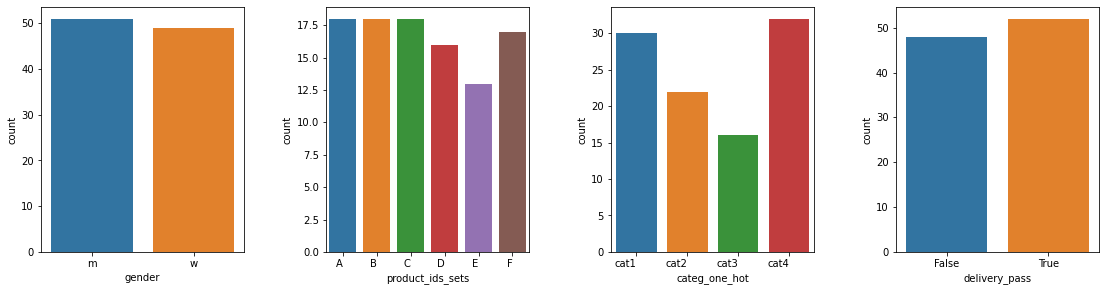

In [558]:
#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

fig, ax =plt.subplots(1,4)
#fig.tight_layout()
ax0 = sns.countplot(x = data_sample['gender'], ax=ax[0])
ax1 = sns.countplot(x = data_sample['product_ids_sets'], ax=ax[1])
ax2 = sns.countplot(x = data_sample['categ_one_hot'], ax=ax[2])
ax3 = sns.countplot(x = data_sample['delivery_pass'], ax=ax[3])
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
#ax = sns.countplot(x="gender", data=data_sample)
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

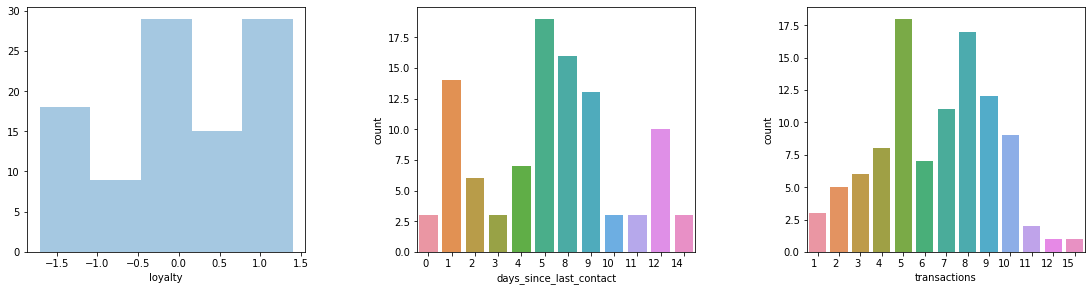

In [559]:
fig, ax =plt.subplots(1,3)
#fig.tight_layout()
ax0 = sns.distplot(data_sample['loyalty'], ax=ax[0], kde = False)
ax1 = sns.countplot(data_sample['days_since_last_contact'], ax=ax[1])
ax2 = sns.countplot(data_sample['transactions'], ax=ax[2])
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
#ax = sns.countplot(x="gender", data=data_sample)
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

At this point we can start formulating some questions that could be interesting to check.

I would start checking what affects the loyalty and amount of transaction, because these are the parameters that will improve the sales. 

The loyal customer will buy more -- > More transactions. 
Here is it interesting to check whether these values are correlated. 
So that we don't have to study both of them, but can just study one. We can also check the correlation of all the variables (maybe there will be something that we haven't noticed yet)

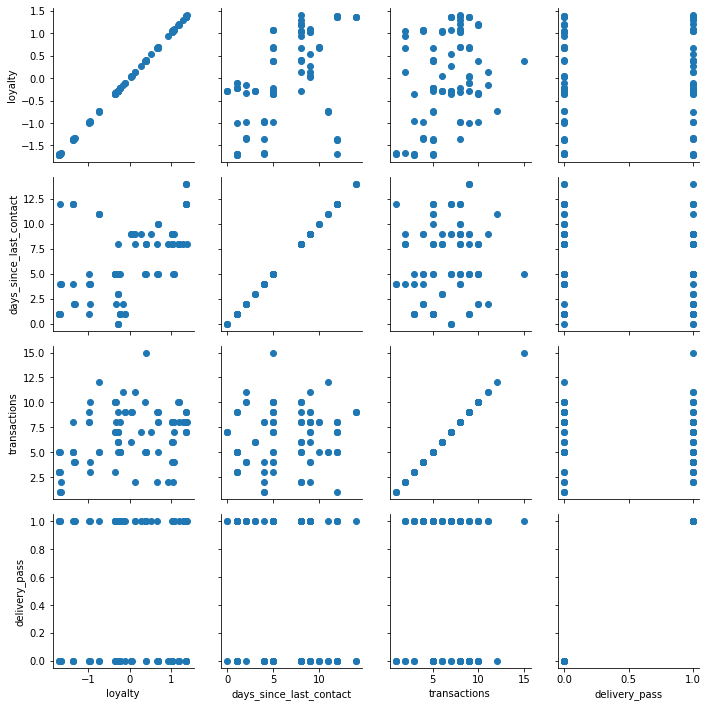

In [562]:
pair_grid_plot = sns.PairGrid(data_sample)
pair_grid_plot.map(plt.scatter)

In [560]:
data_sample.corr()

,loyalty,days_since_last_contact,transactions,delivery_pass
loyalty,1.000000,0.552121,0.370119,0.001538
days_since_last_contact,0.552121,1.000000,0.140573,-0.164417
transactions,0.370119,0.140573,1.000000,-0.063853
delivery_pass,0.001538,-0.164417,-0.063853,1.000000


In [563]:
# Checking general descriptive statistics of our dataframe

data_sample.describe()

,loyalty,days_since_last_contact,transactions
count,100.000000,100.000000,100.000000
mean,-0.000090,6.280000,6.550000
std,1.002703,3.861438,2.709411
min,-1.710000,0.000000,1.000000
25%,-0.742500,3.000000,5.000000
50%,-0.100500,5.000000,7.000000
75%,1.032500,9.000000,8.250000
max,1.400000,14.000000,15.000000


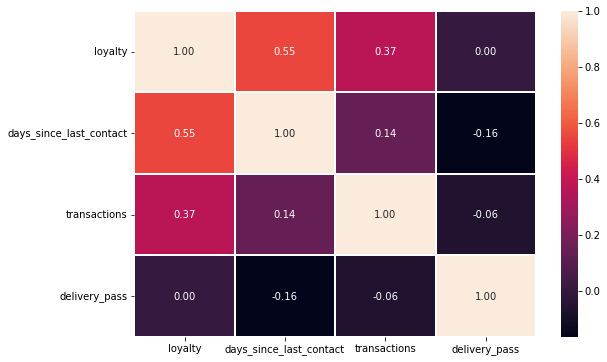

In [564]:
corr = data_sample.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

**Here we see the highest correlation between the loyality and days_since_last_contacted**. 
Let's quickly check if this co

In [379]:
import scipy.stats as sts
coef = sts.pearsonr(data_sample.loyalty, data_sample.days_since_last_contact)[0]
print(f'Pearson coefficient:{coef}')

Коэффициент корреляции Пирсона:0.5521205721277607


In [374]:
reg = np.polyfit(data_sample.loyalty, data_sample.days_since_last_contact, deg = 1)
reg

array([2.12623215, 6.28019136])

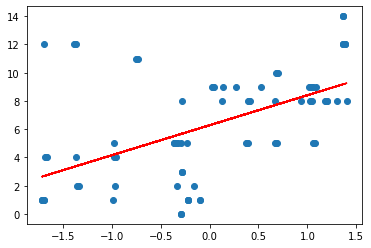

In [377]:
trend = np.polyval(reg, data_sample.loyalty)
plt.scatter(data_sample.loyalty, data_sample.days_since_last_contact)
plt.plot(data_sample.loyalty,trend, 'r')

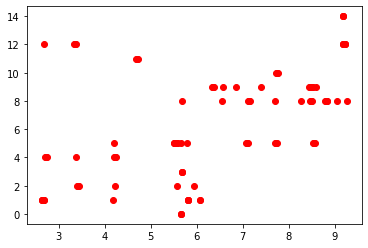

b1------> 2.1262321463337934
b0------> 6.28019136089317
cov-----> 211.63652000000002
Rxy-----> 0.5521205721277604
Sdx-----> 9.976770128152696
SDy-----> 38.420827684993995
X_mean--> -8.999999999999898e-05
y_mean--> 6.28


In [385]:
X = data_sample['loyalty']
y = data_sample['days_since_last_contact']

X_mean = X.mean()
y_mean = y.mean()

SDx = np.sqrt(sum([(i-X_mean)**2 for i in X]))
SDy = np.sqrt(sum([(i-y_mean)**2 for i in y]))

cov = sum([(i-X_mean)*(j-y_mean) for i, j in zip(X, y)])

Rxy = cov/(SDx*SDy)

b1 = (SDy/SDx) * Rxy
b0 = y_mean - X_mean*b1

def predictor(x):
    y = b0 + b1*x
    return y
    
ploter = [predictor(i) for i in X]
plt.plot(ploter, y , 'ro')
plt.show()
print('b1------>', b1)
print('b0------>', b0)
print('cov----->', cov)
print('Rxy----->', Rxy)
print('Sdx----->', SDx)
print('SDy----->', SDy)
print('X_mean-->', X_mean)
print('y_mean-->', y_mean)

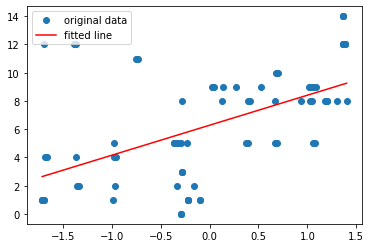

LinregressResult(slope=2.126232146333793, intercept=6.28019136089317, rvalue=0.5521205721277603, pvalue=2.6062911670172237e-09, stderr=0.32434484341660286, intercept_stderr=0.32359139581856794)

In [402]:
import scipy.stats as stats

x = data_sample['loyalty']
y = data_sample['days_since_last_contact']

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'o', label='original data')
plt.plot(x1,y1,'-r', label='fitted line')
plt.legend()
plt.show()
stats.linregress (x, y)

In [390]:
data_sample[['loyalty', 'days_since_last_contact']].describe().round()

,loyalty,days_since_last_contact
count,100.0,100.0
mean,-0.0,6.0
std,1.0,4.0
min,-2.0,0.0
25%,-1.0,3.0
50%,-0.0,5.0
75%,1.0,9.0
max,1.0,14.0


Here we want to check if gender affects the delivery_pass. Here could be 2 hypothesis.

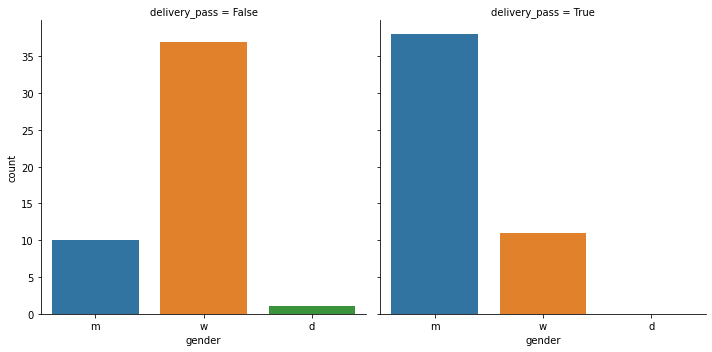

In [331]:
sns.catplot(x = 'gender', col = 'delivery_pass', kind = 'count', data = data_sample)

Here we want to check if gender affects the product_ids_sets:

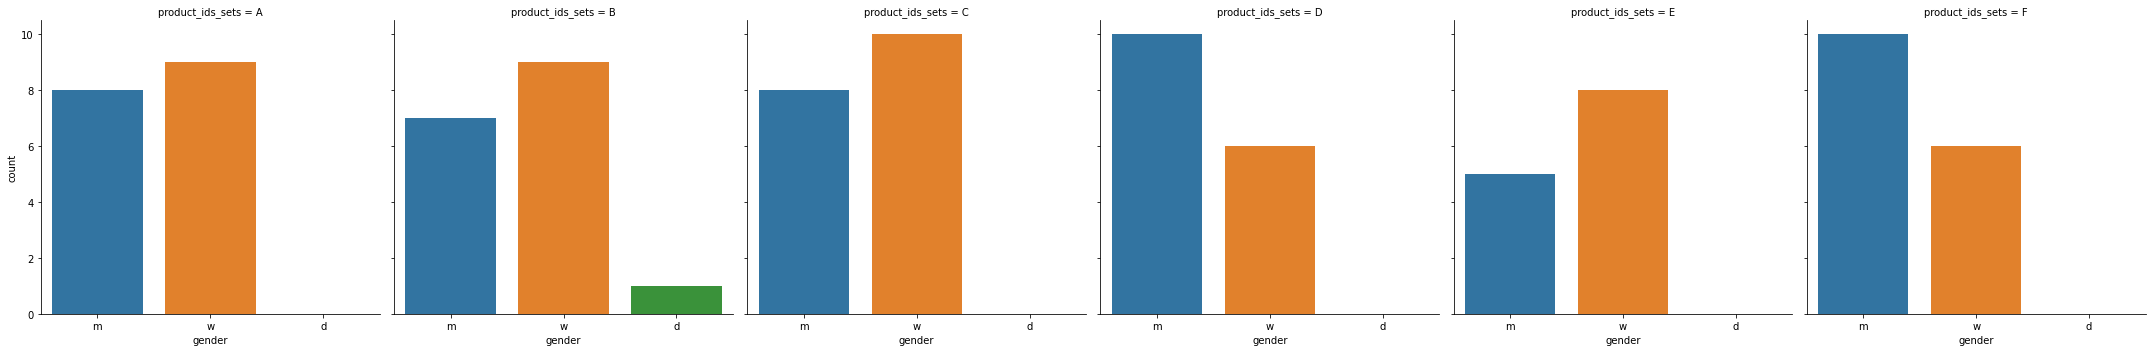

In [335]:
sns.catplot(x = 'gender', col = 'product_ids_sets', kind = 'count', data = data_sample)

There are some products sets which man or women buy more. 

We could also check whether these differences are statistically significant.

**How can I do it via A/B tests if I have several categories?**

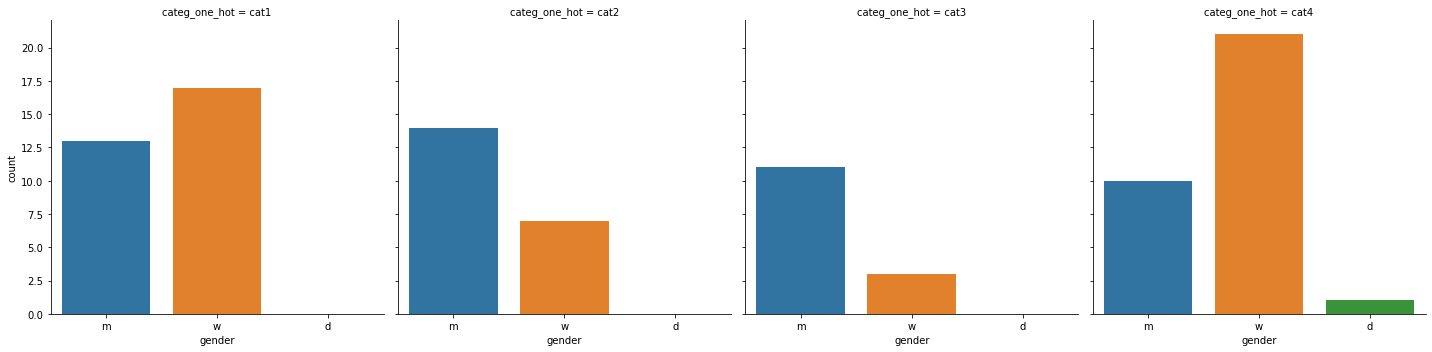

In [404]:
sns.catplot(x = 'gender', col = 'categ_one_hot', kind = 'count', data = data_sample)

**Here we also see that there are some differences between women and men in choosing different categories.**

**Is there a difference in loyalty between women and men?**

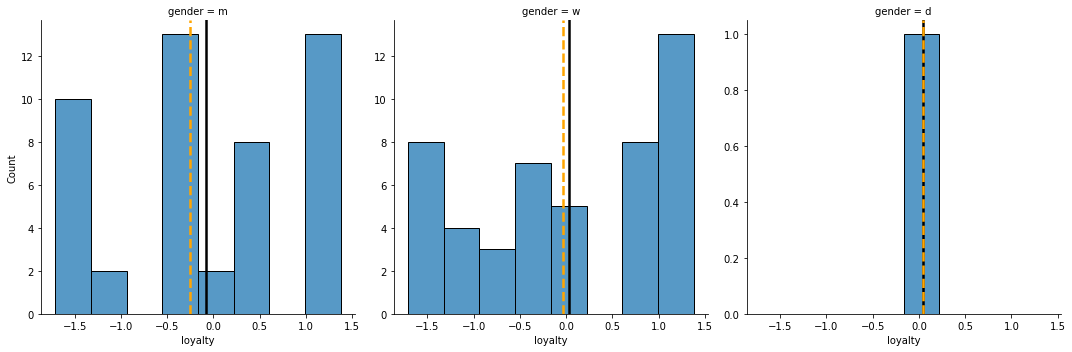

In [424]:
#g = sns.displot(data_sample, x="loyalty", col="gender");

g = sns.displot(data_sample, x="loyalty", col="gender",  
    facet_kws=dict(sharey=False, sharex=False))

def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)

g.map(specs,'loyalty' );

It is difficult to say at the moment if there is a difference. So we can maybe come to this later.

In [ ]:
Is there a difference between loyalty between women and men

Who made more transactions: men or women?

In [357]:
data_sample.groupby('gender', as_index = False).agg({'transactions':'sum'}).sort_values('transactions', ascending = False)

,gender,transactions
2,w,327
1,m,299
0,d,6


Who is more loyal: men or women?

In [362]:
data_sample.groupby('gender', as_index = False).agg({'transactions':'sum', 'loyalty':'median'}).sort_values('transactions', ascending = False)

,gender,transactions,loyalty
2,w,327,-0.035
1,m,299,-0.254
0,d,6,0.040


In [365]:
pd.crosstab(data_sample.gender, data_sample.product_ids_sets, margins=True).style.background_gradient(cmap='autumn_r')

product_ids_sets,A,B,C,D,E,F,All
gender,,,,,,,
d,0,1,0,0,0,0,1
m,8,7,8,10,5,10,48
w,9,9,10,6,8,6,48
All,17,17,18,16,13,16,97


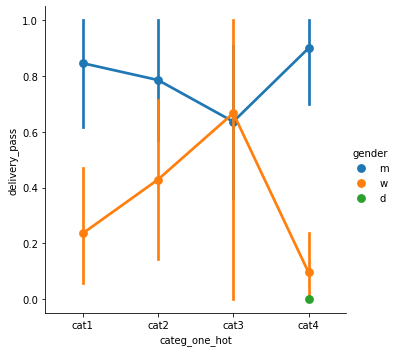

In [367]:
# 
sns.catplot('categ_one_hot','delivery_pass',hue = 'gender', kind = 'point', data = data_sample)

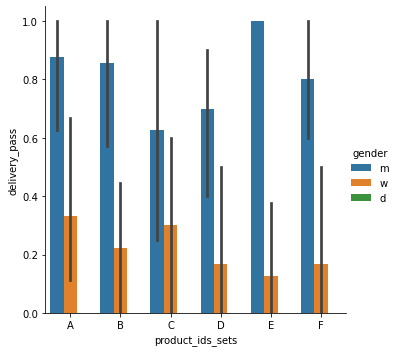

In [371]:
sns.catplot('product_ids_sets','delivery_pass',hue = 'gender', kind = 'bar', data = data_sample)

## Products

In [244]:
products.id.nunique

<bound method IndexOpsMixin.nunique of 0       7881
1      10834
2      61603
3      63288
4     125830
5      62040
6     125716
7    5373751
Name: id, dtype: int64>

In [245]:
from ast import literal_eval
data_sample['list_product_ids'] = data_sample['product_ids'].apply(literal_eval)

In [246]:
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]"
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]"
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]"
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]"
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]"


In [247]:
data_sample['count_product_ids'] = data_sample.list_product_ids.apply(lambda x: len(x))
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]",6
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]",5
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]",2
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]",2
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]",5


In [248]:
products_data = data_sample.iloc[:, 7:10]
products_data.shape

(100, 3)

In [249]:
list_fruits=pd.DataFrame(products_data.list_product_ids.tolist(), index= data_sample.index)
list_fruits.head()

,0,1,2,3,4,5
0,7881,10834,61603.0,62040.0,63288.0,125830.0
1,10834,61603,62040.0,63288.0,125830.0,NaN
2,63288,125830,NaN,NaN,NaN,NaN
3,7881,10834,NaN,NaN,NaN,NaN
4,7881,10834,62040.0,63288.0,125830.0,NaN


In [250]:
list_fruits_unique = pd.DataFrame(pd.unique(list_fruits.values.ravel('K'))).rename(columns = {0 : 'id'}).dropna()
list_fruits_unique.sort_values('id')

,id
0,7881.0
1,10834.0
3,61603.0
5,62040.0
2,63288.0
4,125830.0


In [251]:
list_fruits_unique.merge(products, on = 'id', how='left').sort_values('id')

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881.0,mango,fruits,1,0,True,DE
1,10834.0,ovomaltine schokolade,sweets,2,3,False,DE
3,61603.0,nutella,sweets,2,3,False,DE
5,62040.0,chips,salty,2,3,False,DE
2,63288.0,birnen,fruits,1,0,True,DE
4,125830.0,karotten,vegetables,1,1,False,DE


In [252]:
data_sample.tail()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids
95,w,-0.22,1,5,"[63288,125830]",cat2,False,C,"[63288, 125830]",2
96,m,-0.29,5,5,"[63288,125830]",cat4,False,C,"[63288, 125830]",2
97,w,1.09,9,8,"[7881,10834]",cat4,True,D,"[7881, 10834]",2
98,w,-1.69,12,1,"[7881,10834,62040,63288,125830]",cat1,False,E,"[7881, 10834, 62040, 63288, 125830]",5
99,m,-1.71,1,3,"[7881,10834,61603]",cat1,True,F,"[7881, 10834, 61603]",3


In [254]:
#for i, l in enumerate(data_sample["list_product_ids"]):
 #   print("list",i,"is",type(l))

In [255]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [256]:
to_1D(data_sample["list_product_ids"]).value_counts()

10834     82
63288     67
125830    67
7881      64
61603     53
62040     49
dtype: int64

In [257]:
map_dict = dict(zip(products.id,products.name))
data_sample['names_products'] = data_sample['list_product_ids'].explode().map(map_dict).groupby(level=0).agg(list)

In [258]:
products.head()

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881,mango,fruits,1,0,True,DE
1,10834,ovomaltine schokolade,sweets,2,3,False,DE
2,61603,nutella,sweets,2,3,False,DE
3,63288,birnen,fruits,1,0,True,DE
4,125830,karotten,vegetables,1,1,False,DE


In [259]:
pd. __version__

'1.4.2'

In [260]:
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids,names_products
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]",6,"[mango, ovomaltine schokolade, nutella, chips,..."
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]",5,"[ovomaltine schokolade, nutella, chips, birnen..."
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]",2,"[birnen, karotten]"
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]",2,"[mango, ovomaltine schokolade]"
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]",5,"[mango, ovomaltine schokolade, chips, birnen, ..."


**What is the most popular product that was bought?**

In [261]:
unique_products = to_1D(data_sample["names_products"])
unique_products.value_counts().sort_values(ascending = False)

ovomaltine schokolade    82
birnen                   67
karotten                 67
mango                    64
nutella                  53
chips                    49
dtype: int64

Text(0.5, 1.0, "Customer's Favorite Products")

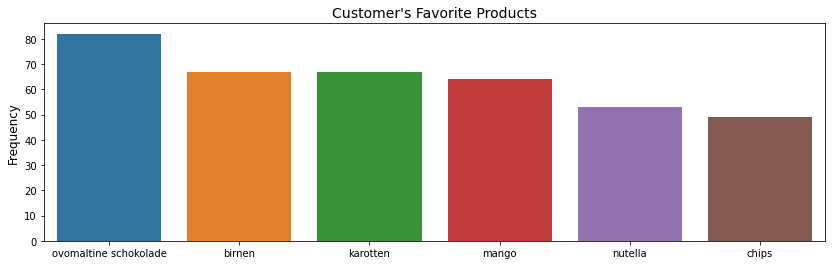

In [262]:
fig, ax = plt.subplots(figsize = (14,4))
sns.barplot(x = unique_products.value_counts().index, y = unique_products.value_counts().values, data =data_sample)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Customer's Favorite Products", size = 14)

In [263]:
products_expanded_v1 = data_sample['names_products'].apply(pd.Series)
products_expanded_v1.head()

,0,1,2,3,4,5
0,mango,ovomaltine schokolade,nutella,chips,birnen,karotten
1,ovomaltine schokolade,nutella,chips,birnen,karotten,NaN
2,birnen,karotten,NaN,NaN,NaN,NaN
3,mango,ovomaltine schokolade,NaN,NaN,NaN,NaN
4,mango,ovomaltine schokolade,chips,birnen,karotten,NaN


In [264]:
#What is the most popular amount of sets bought?

In [265]:
unique_products = to_1D(data_sample['names_products']).value_counts()
unique_products

ovomaltine schokolade    82
birnen                   67
karotten                 67
mango                    64
nutella                  53
chips                    49
dtype: int64

In [266]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [267]:
products_bool = boolean_df(data_sample['names_products'], unique_products.keys())

In [268]:
products_bool

,ovomaltine schokolade,birnen,karotten,mango,nutella,chips
0,True,True,True,True,True,True
1,True,True,True,False,True,True
2,False,True,True,False,False,False
3,True,False,False,True,False,False
4,True,True,True,True,False,True
...,...,...,...,...,...,...
95,False,True,True,False,False,False
96,False,True,True,False,False,False
97,True,False,False,True,False,False
98,True,True,True,True,False,True


In [269]:
products_bool = products_bool.corr(method = "pearson")  # no need to specify the method, as pearson and spearman will return the same results.
#fruits_corr = fruits_bool.corr(method = "pearson") One straight forward way is the Pearson correlation coefficient, which can also be used for binary data.

In [270]:
products_bool

,ovomaltine schokolade,birnen,karotten,mango,nutella,chips
ovomaltine schokolade,1.000000,-0.328813,-0.328813,0.624695,0.497529,0.459243
birnen,-0.328813,1.000000,1.000000,-0.526358,0.020879,0.687911
karotten,-0.328813,1.000000,1.000000,-0.526358,0.020879,0.687911
mango,0.624695,-0.526358,-0.526358,1.000000,0.045081,-0.015003
nutella,0.497529,0.020879,0.020879,0.045081,1.000000,0.402005
chips,0.459243,0.687911,0.687911,-0.015003,0.402005,1.000000


This is very useful! We can answer questions like: If customers likes ovomaltine, what kind of product is they propably going to like, too?

In [345]:
products_bool["ovomaltine schokolade"].sort_values(ascending = False)

ovomaltine schokolade    1.000000
mango                    0.624695
nutella                  0.497529
chips                    0.459243
birnen                  -0.328813
karotten                -0.328813
Name: ovomaltine schokolade, dtype: float64

We can tell that mango is the fruit that is most commonly liked by customers who like ovomaltine.

Another useful thing to do is to count how many times an item co-occurs with the other items. This can easily be done using vectorized matrix multiplication. For that, we'll need to convert the boolean values to integers.

In [346]:
products_float = products_bool.astype(float)
products_float.head(10)

,ovomaltine schokolade,birnen,karotten,mango,nutella,chips
ovomaltine schokolade,1.000000,-0.328813,-0.328813,0.624695,0.497529,0.459243
birnen,-0.328813,1.000000,1.000000,-0.526358,0.020879,0.687911
karotten,-0.328813,1.000000,1.000000,-0.526358,0.020879,0.687911
mango,0.624695,-0.526358,-0.526358,1.000000,0.045081,-0.015003
nutella,0.497529,0.020879,0.020879,0.045081,1.000000,0.402005
chips,0.459243,0.687911,0.687911,-0.015003,0.402005,1.000000


Plot the table above and cut the half

In [347]:
products_freq_mat = np.dot(products_float.T, products_float)
products_freq_mat

array([[ 2.0649187 , -0.9889454 , -0.9889454 ,  1.61107561,  1.19410678,
         0.65673366],
       [-0.9889454 ,  2.85882825,  2.85882825, -1.79385985,  0.15185846,
         1.92901981],
       [-0.9889454 ,  2.85882825,  2.85882825, -1.79385985,  0.15185846,
         1.92901981],
       [ 1.61107561, -1.79385985, -1.79385985,  1.94660579,  0.37295512,
        -0.4491712 ],
       [ 1.19410678,  0.15185846,  0.15185846,  0.37295512,  1.41204687,
         1.06054538],
       [ 0.65673366,  1.92901981,  1.92901981, -0.4491712 ,  1.06054538,
         2.31918085]])

In [348]:
products_freq = pd.DataFrame(products_freq_mat, columns = unique_products.keys(), index = unique_products.keys())

In [349]:
products_freq

,ovomaltine schokolade,birnen,karotten,mango,nutella,chips
ovomaltine schokolade,2.064919,-0.988945,-0.988945,1.611076,1.194107,0.656734
birnen,-0.988945,2.858828,2.858828,-1.793860,0.151858,1.929020
karotten,-0.988945,2.858828,2.858828,-1.793860,0.151858,1.929020
mango,1.611076,-1.793860,-1.793860,1.946606,0.372955,-0.449171
nutella,1.194107,0.151858,0.151858,0.372955,1.412047,1.060545
chips,0.656734,1.929020,1.929020,-0.449171,1.060545,2.319181


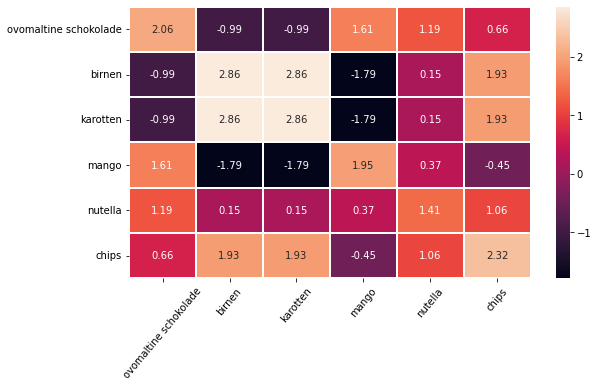

In [350]:
import seaborn as sn
fig, ax = plt.subplots(figsize = (9,5))
sn.heatmap(products_freq, annot = True, linewidths = 1.5, fmt = '.2f',  ax = ax)
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)

**Bivariate Analysis**

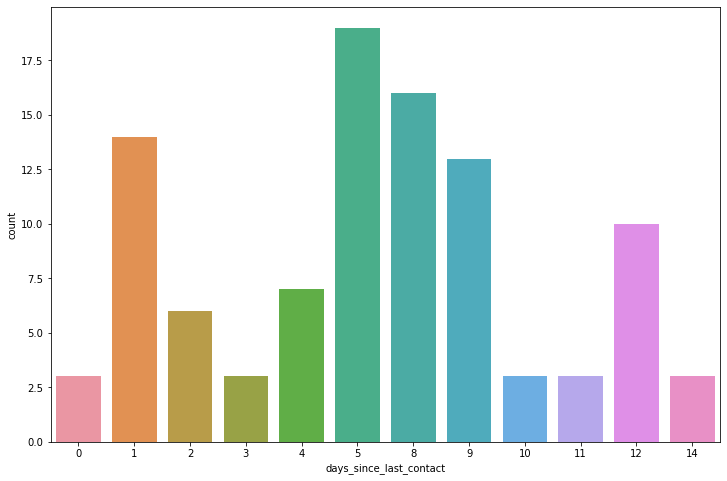

In [91]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="days_since_last_contact", data=data_sample)

array([<AxesSubplot:ylabel='gender'>], dtype=object)

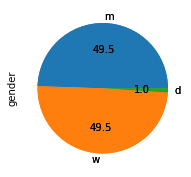

In [92]:
# Visualizing the object data as pie charts to see their destribution

#define Seaborn color palette to use

data_sample['gender'].value_counts().plot(kind='pie', autopct='%.1f', figsize=(5,3))


data_sample['gender'].value_counts().plot(kind='pie', subplots=True, autopct='%.1f', figsize=(5,3))


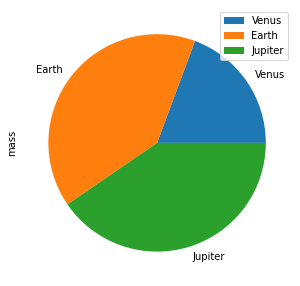

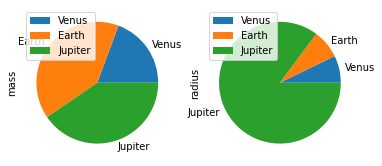

In [93]:
df = pd.DataFrame({'mass': [2.87, 5.97, 6.00],
                   'radius': [6051.8, 6378.1, 71492]},
                  index=['Venus', 'Earth', 'Jupiter'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

plot = df.plot.pie(subplots=True, figsize=(6, 4))

In [95]:
# Let's check what is the percentages of the values in each column

data_sample.gender.value_counts().sort_values(ascending = False)

m    48
w    48
d     1
Name: gender, dtype: int64

In [96]:
data_sample[['gender', 'delivery_pass']].apply(pd.Series.value_counts)

,gender,delivery_pass
d,1.0,NaN
m,48.0,NaN
w,48.0,NaN
True,NaN,52.0
False,NaN,48.0


In [97]:
def replace_space_and_capital(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

data_sample = data_sample.rename(columns = replace_space_and_capital)

In [98]:
data_sample.product_ids.head()

0    [7881,10834,61603,62040,63288,125830]
1         [10834,61603,62040,63288,125830]
2                           [63288,125830]
3                             [7881,10834]
4          [7881,10834,62040,63288,125830]
Name: product_ids, dtype: object

In [99]:
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids,names_lists
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]",6,"[mango, ovomaltine schokolade, nutella, chips,..."
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]",5,"[ovomaltine schokolade, nutella, chips, birnen..."
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]",2,"[birnen, karotten]"
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]",2,"[mango, ovomaltine schokolade]"
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]",5,"[mango, ovomaltine schokolade, chips, birnen, ..."


In [100]:
user_df = data_sample[['product_ids', 'person_id']]
user_df.head(10)

KeyError: "['person_id'] not in index"

In [ ]:
#products_sets = 
data_sample.groupby('product_ids', as_index = False).agg({'person_id' : 'count', 'transactions' : 'sum', 'days_since_last_contact' : 'mean'}).sort_values('person_id', ascending = False) \
    .rename(columns ={'person_id' : 'count'})

In [ ]:
type(data_sample.product_ids[0])

In [ ]:
from ast import literal_eval
len(literal_eval(data_sample.product_ids[0]))

In [ ]:
buying_days = data_sample.groupby('days_since_last_contact', as_index = False).agg({'person_id' : 'count'})
#.sort_values('person_id', ascending = False) \
#    .rename(columns ={'person_id' : 'count_days'}).sort_values('days_since_last_contact')
buying_days

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="days_since_last_contact", data=data_sample)

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="transactions", data=data_sample)

In [ ]:
#products_sets = 
trans_sum_per_day = data_sample.groupby('days_since_last_contact', as_index = False).agg({'transactions' : 'sum'}).sort_values('transactions', ascending = False) \
    .rename(columns ={'transactions' : 'transactions_sum'}).sort_values('days_since_last_contact')
trans_sum_per_day.head()

**Is there any trend between the days since last contacted and amount of transactions**

In [ ]:
sns.scatterplot(data=data_sample, x="days_since_last_contact", y="transactions")
#here we see that the dates 6 and 7 are absent

In [ ]:
sns.scatterplot(data=trans_sum_per_day, x="days_since_last_contact", y="transactions_sum")

In [ ]:
sns.scatterplot(data=data_sample, x="days_since_last_contact", y="loyalty")

In [ ]:
sns.scatterplot(data=data_sample, x="transactions", y="loyalty")

In [ ]:
data_sample.groupby('days_since_last_contact', as_index = False).agg({'person_id' : 'count', 'transactions' : 'sum', 'count_product_ids' : 'sum'}).sort_values('person_id', ascending = False) \
    .rename(columns ={'person_id' : 'count_days'}).sort_values('days_since_last_contact')

**Importing products data**

In [ ]:
sheet_name2 = 'products'

url2 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name2}"

products=pd.read_csv(url2)
products.head()

**Merging products and data_sample tables**

In [ ]:
l = list_fruits[0]
fruits[]
df['contains'] = df['text'].apply(lambda x: ','.join([i for i in l if i in x]))

In [ ]:
list_fruits.iloc[:1]

In [ ]:
data_sample.list_product_ids.head()

In [ ]:
new_table = []
pd.DataFrame(np.sort((data_sample.list_product_ids.tolist(), index= data_sample.index), axis = 1), columns = data_sample.columns)

In [ ]:
# Reading data as a pandas data frame.
# We have three tables: data_sample, products, person.

sheet_id = '1CrIcItzuVRaYz3g2V6adq7D1flsGM6zbVp9YS4mJz3s' 

sheet_name1 = 'data_sample'
sheet_name2 = 'products'
sheet_name3 = 'person'

url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name1}"

data_sample=pd.read_csv(url1)
data_sample.head()